# Team info:

Project Title: Analysis of University Rankings in VA and Student Outcomes

Team name: Algorithm Avengers

Team member names and PIDs:
- Esther Kim - estherkdy
- Kaitlyn Green - kaitlyngreen
- Ben Clements - benc04 
- Hieu Ngo - hieu 
- Jackson Rowley - jacksonrowley04 



# Project introduction:
### Initial description of the project topic

Investigate relation between University Rankings and employment rates, income, salary growth, and average debt.


### Potential research questions you plan to address

What factors most significantly influence university rankings among Virginia universities?

Is there a correlation between university rankings and graduate employment rates in Virginia?

Is there a correlation between university rankings and starting salary?

Is there a correlation between university rankings and salary growth in the first few years?

How does school ranking correlate with job placement and salary trends in different industries?

What is the impact of new degrees on employment rates?

### Description of potential source data that would be relevant (including links or references if possible).

Best Colleges in Virginia and Categorial Rankings: https://www.usnews.com/best-colleges/va

List of Colleges & Universities in VA with school populations: 
https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_Virginia

Offers salary data based on employment reports, filtering by degree, and more possible: 
https://www.glassdoor.com/index.htm.

US Dept of Education, has tuition, mean salary, and graduation rate of universities: 
https://collegescorecard.ed.gov/school/?234076-University-of-Virginia-Main-Campus 





In [1]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

(TODO: Intro description)

In [31]:
# df = pd.read_csv('US_news_ranking.csv')
df = pd.read_csv('US_news_ranking_UPDATED.csv') 
df.fillna('Not Available', inplace=True)

pd.set_option('display.max_columns', None)  # to show all columns
pd.set_option('display.width', 1000)  # display width adjustment

#print(df.to_string(index=False))
df

,Name,Location,National Rank,Category,Tuition (Out-of-State),Tuition (In-State),Undergraduate Enrollment,VA Rank
0,University of Virginia,Charlottesville VA,24,National Universities,60907,23118,17618,1
1,Virginia Tech,Blacksburg VA,51,National Universities,37158,15948,30504,2
2,William & Mary,Williamsburg VA,54,National Universities,50752,26019,6963,3
3,George Mason University,Fairfax VA,109,National Universities,38688,14220,27666,4
4,Virginia Commonwealth University,Richmond VA,136,National Universities,39194,16720,21205,5
5,James Madison University,Harrisonburg VA,148,National Universities,31264,13918,21008,6
6,Hampton University,Hampton VA,273,National Universities,30842,30842,3255,7
7,Marymount University,Arlington VA,288,National Universities,40120,40120,2216,8
8,Old Dominion University,Norfolk VA,296,National Universities,33780,12750,17736,9
9,Radford University,Radford VA,315,National Universities,25186,12548,5704,10


### Top 10 Universities in Virginia According to U.S. News Rankings

This chart highlights the top 10 universities in Virginia based on the U.S. News & World Report rankings. The rankings provide insights into the academic reputation, tuition costs, and undergraduate enrollment of each institution.

In [35]:
#print(df.head(11))
df.head(11)

,Name,Location,National Rank,Category,Tuition (Out-of-State),Tuition (In-State),Undergraduate Enrollment,VA Rank
0,University of Virginia,Charlottesville VA,24,National Universities,60907,23118,17618,1
1,Virginia Tech,Blacksburg VA,51,National Universities,37158,15948,30504,2
2,William & Mary,Williamsburg VA,54,National Universities,50752,26019,6963,3
3,George Mason University,Fairfax VA,109,National Universities,38688,14220,27666,4
4,Virginia Commonwealth University,Richmond VA,136,National Universities,39194,16720,21205,5
5,James Madison University,Harrisonburg VA,148,National Universities,31264,13918,21008,6
6,Hampton University,Hampton VA,273,National Universities,30842,30842,3255,7
7,Marymount University,Arlington VA,288,National Universities,40120,40120,2216,8
8,Old Dominion University,Norfolk VA,296,National Universities,33780,12750,17736,9
9,Radford University,Radford VA,315,National Universities,25186,12548,5704,10


### Top 10 Virginia Universities by U.S. News Ranking: In-State vs. Out-of-State Tuition Comparison

This chart presents the top 10 universities in Virginia as ranked by U.S. News, showing a comparison of in-state and out-of-state tuition costs. Each university's tuition fees are shown side-by-side illustrating the difference in cost for resident versus non-resident students. When tuition for in-state and out-of-state is the same, that indicates its a private university, as is the case for Hampton University and Marymount University.

C:\Users\Kaitlyn Green\AppData\Local\Temp\ipykernel_18736\3589874168.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tuition (Out-of-State)'].fillna(0, inplace=True)
C:\Users\Kaitlyn Green\AppData\Local\Temp\ipykernel_18736\3589874168.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

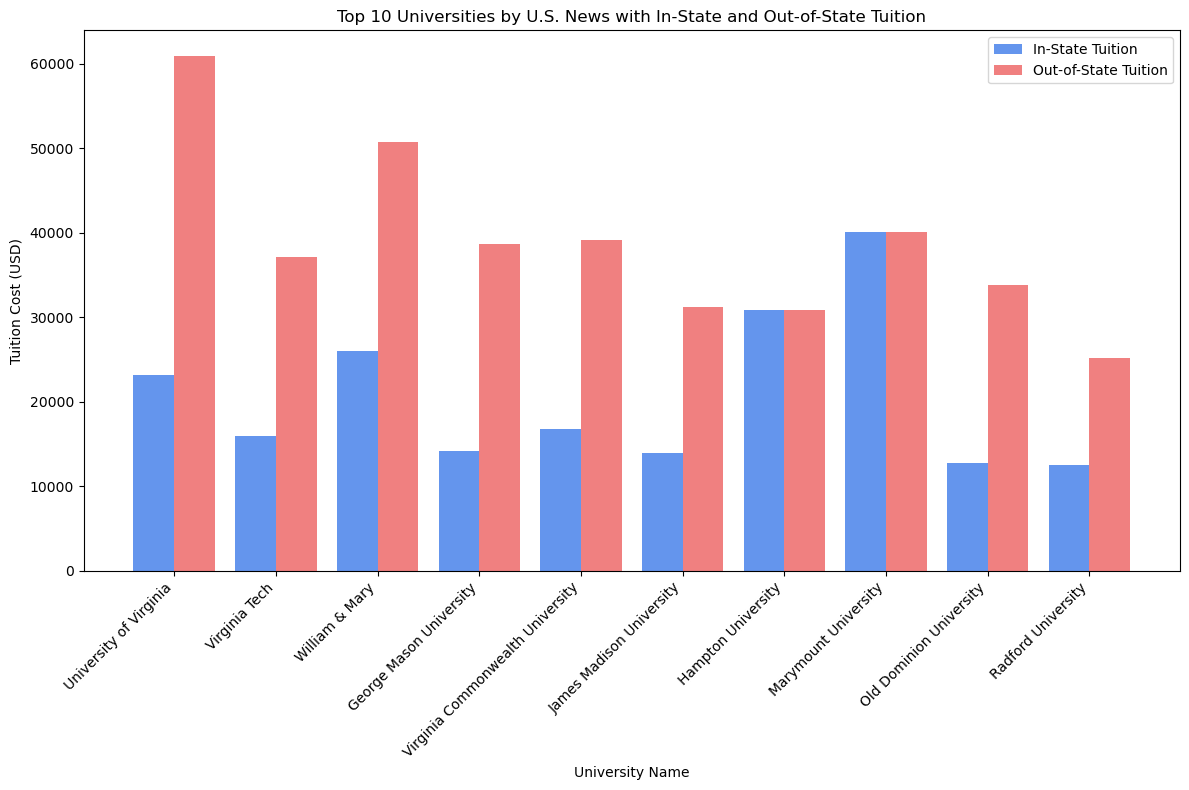

In [37]:
import matplotlib.pyplot as plt


# convert tuition col to numeric values, and handling non numeric with coerce 
df['Tuition (Out-of-State)'] = pd.to_numeric(df['Tuition (Out-of-State)'], errors='coerce')
df['Tuition (In-State)'] = pd.to_numeric(df['Tuition (In-State)'], errors='coerce')

# fill Not Available fields with 0
df['Tuition (Out-of-State)'].fillna(0, inplace=True)
df['Tuition (In-State)'].fillna(0, inplace=True)
 
top_10_universities = df.head(10)  

# plot
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4  # bar width 
indices = np.arange(len(top_10_universities))  

# plotting both in state and out of state tuition side by side
ax.bar(indices - width/2, top_10_universities['Tuition (In-State)'], width, label='In-State Tuition', color='cornflowerblue')
ax.bar(indices + width/2, top_10_universities['Tuition (Out-of-State)'], width, label='Out-of-State Tuition', color='lightcoral')

# x axis and y axis
ax.set_xlabel('University Name')
ax.set_ylabel('Tuition Cost (USD)')
ax.set_title('Top 10 Universities by U.S. News with In-State and Out-of-State Tuition')
ax.set_xticks(indices)
ax.set_xticklabels(top_10_universities['Name'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()   
plt.show()

(TODO: insight here)